In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset
from vicinal_classification import single_point_vicinal
from utilities import visclassifier

In [2]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_random_classification_dataset(120, 2, need_flip=0.1)

In [3]:
from sklearn.svm import SVC

In [4]:
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(train_data, train_labels)
print(np.mean(svc.predict(train_data) == train_labels), np.mean(svc.predict(val_data) == val_labels), np.mean(svc.predict(test_data) == test_labels))

0.8611111111111112 0.9583333333333334 0.9583333333333334


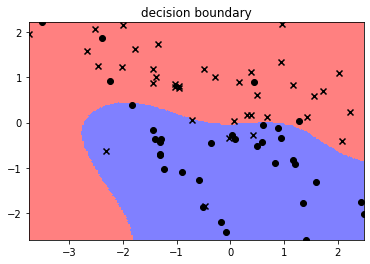

In [5]:
visclassifier(svc.predict, train_data, train_labels, 'decision boundary')

In [6]:
data_perturb, labels_perturb = single_point_vicinal(train_data, train_labels, 0.5, 3, 'gaussian', augment=False)

In [7]:
svc_perturb = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_perturb.fit(data_perturb, labels_perturb)
print(np.mean(svc_perturb.predict(data_perturb) == labels_perturb), np.mean(svc_perturb.predict(val_data) == val_labels), np.mean(svc_perturb.predict(test_data) == test_labels))

0.7962962962962963 0.875 0.9166666666666666


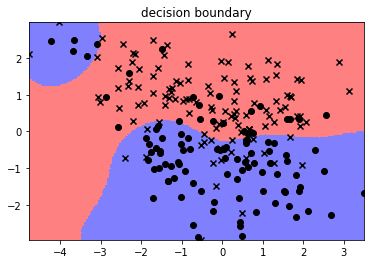

In [8]:
visclassifier(svc_perturb.predict, data_perturb, labels_perturb, 'decision boundary')

In [9]:
data_augment, labels_augment = single_point_vicinal(train_data, train_labels, 0.5, 3, 'gaussian', augment=True)
svc_augment = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_augment.fit(data_augment, labels_augment)
print(np.mean(svc_augment.predict(data_augment) == labels_augment), np.mean(svc_augment.predict(val_data) == val_labels), np.mean(svc_augment.predict(test_data) == test_labels))

0.78125 0.9166666666666666 0.9583333333333334


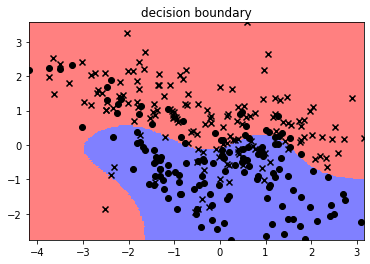

In [10]:
visclassifier(svc_augment.predict, data_augment, labels_augment, 'decision boundary')